# API Data Wrangling with Open-Meteo

In this exercise, we will:

- Fetch historical weather data using the **Open-Meteo API**.
- Parse and clean the data using **pandas**.
- Perform exploratory data analysis.
- Visualize weather trends.

In [1]:
# Install required packages if not already installed
# !pip install requests pandas matplotlib --quiet

In [2]:
# Import Libraries
import requests
import pandas as pd
import matplotlib.pyplot as plt

# Optional: Configure matplotlib for inline display in Jupyter
%matplotlib inline

## Understand the Open-Meteo API

- **API Endpoint**: `https://archive-api.open-meteo.com/v1/archive`
- **Parameters**:
  - `latitude`: Latitude of the location.
  - `longitude`: Longitude of the location.
  - `start_date`: Start date of the data (YYYY-MM-DD).
  - `end_date`: End date of the data (YYYY-MM-DD).
  - `hourly`: Comma-separated list of variables (e.g., temperature, precipitation).
  - `timezone`: Timezone of the data.

**Documentation**: [Open-Meteo API Docs](https://open-meteo.com/en/docs)

In [3]:
# Step 1: Set Up Parameters

# Location coordinates for New York City
latitude = 40.7128
longitude = -74.0060

# Date range
start_date = '2023-01-01'
end_date = '2023-01-07'  # One week of data

# Variables to fetch
hourly_variables = ['temperature_2m', 'relativehumidity_2m', 'precipitation']


In [4]:
# Step 2: Make the API Request

base_url = 'https://archive-api.open-meteo.com/v1/archive'

params = {
    'latitude': latitude,
    'longitude': longitude,
    'start_date': start_date,
    'end_date': end_date,
    'hourly': ','.join(hourly_variables),
    'timezone': 'America/New_York'
}

response = requests.get(base_url, params=params)


In [5]:
# Check if the request was successful

if response.status_code == 200:
    print('Data fetched successfully!')
else:
    print(f'Failed to fetch data. Status code: {response.status_code}')


Data fetched successfully!


In [6]:
# Step 3: Load Data into pandas DataFrame

data = response.json()
hourly_data = data['hourly']

df = pd.DataFrame(hourly_data)
df.head()


,time,temperature_2m,relativehumidity_2m,precipitation
0,2023-01-01T00:00,10.7,99,1.0
1,2023-01-01T01:00,10.5,99,1.0
2,2023-01-01T02:00,10.4,98,0.1
3,2023-01-01T03:00,10.3,96,0.0
4,2023-01-01T04:00,9.7,95,0.0


In [7]:
# Step 4: Data Cleaning

# Convert 'time' column to datetime
df['time'] = pd.to_datetime(df['time'])

# Set 'time' as the index
df.set_index('time', inplace=True)

# Check for missing values
df.isnull().sum()


temperature_2m         0
relativehumidity_2m    0
precipitation          0
dtype: int64

In [8]:
# Handle missing values (if any)
df.fillna(method='ffill', inplace=True)  # Forward fill


C:\Users\USUARIO\AppData\Local\Temp\ipykernel_14168\1928920962.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill


In [9]:
# Step 5: Exploratory Data Analysis

# Summary Statistics
df.describe()

,temperature_2m,relativehumidity_2m,precipitation
count,168.000000,168.000000,168.000000
mean,8.371429,86.422619,0.142857
std,3.495063,12.799933,0.436037
min,0.400000,45.000000,0.000000
25%,5.900000,81.000000,0.000000
50%,8.250000,90.500000,0.000000
75%,11.100000,97.000000,0.000000
max,17.900000,100.000000,3.100000


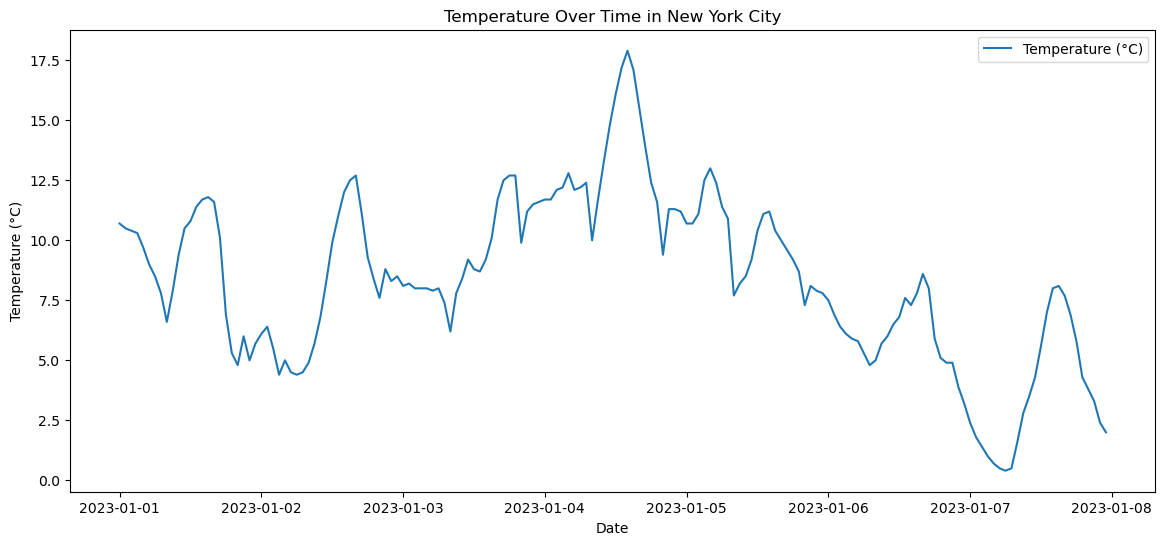

In [10]:
# Plot Temperature Over Time

plt.figure(figsize=(14, 6))
plt.plot(df.index, df['temperature_2m'], label='Temperature (°C)')
plt.title('Temperature Over Time in New York City')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

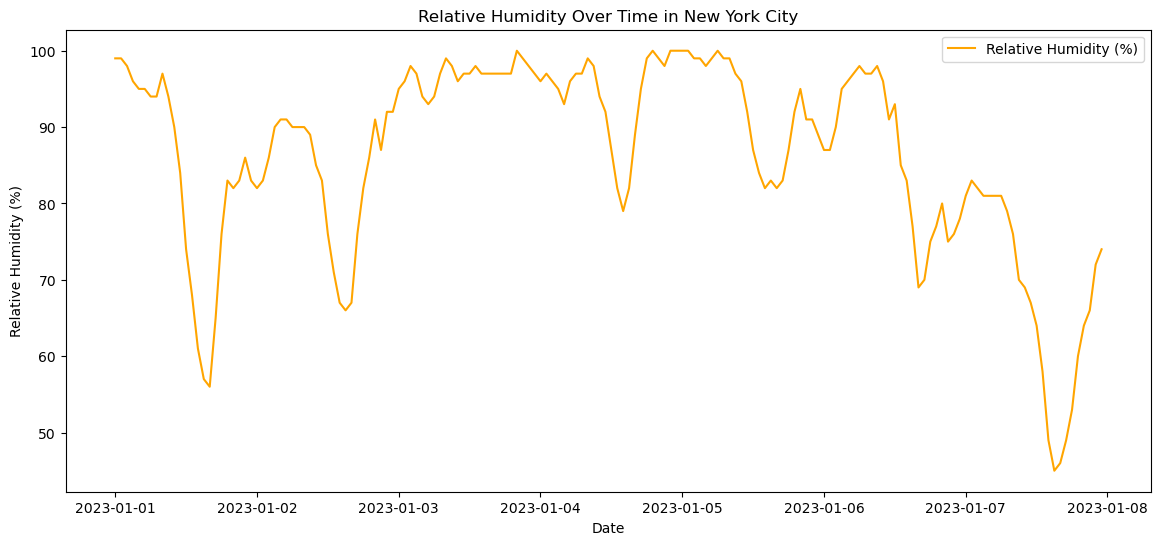

In [11]:
# Plot Relative Humidity Over Time

plt.figure(figsize=(14, 6))
plt.plot(df.index, df['relativehumidity_2m'], color='orange', label='Relative Humidity (%)')
plt.title('Relative Humidity Over Time in New York City')
plt.xlabel('Date')
plt.ylabel('Relative Humidity (%)')
plt.legend()
plt.show()


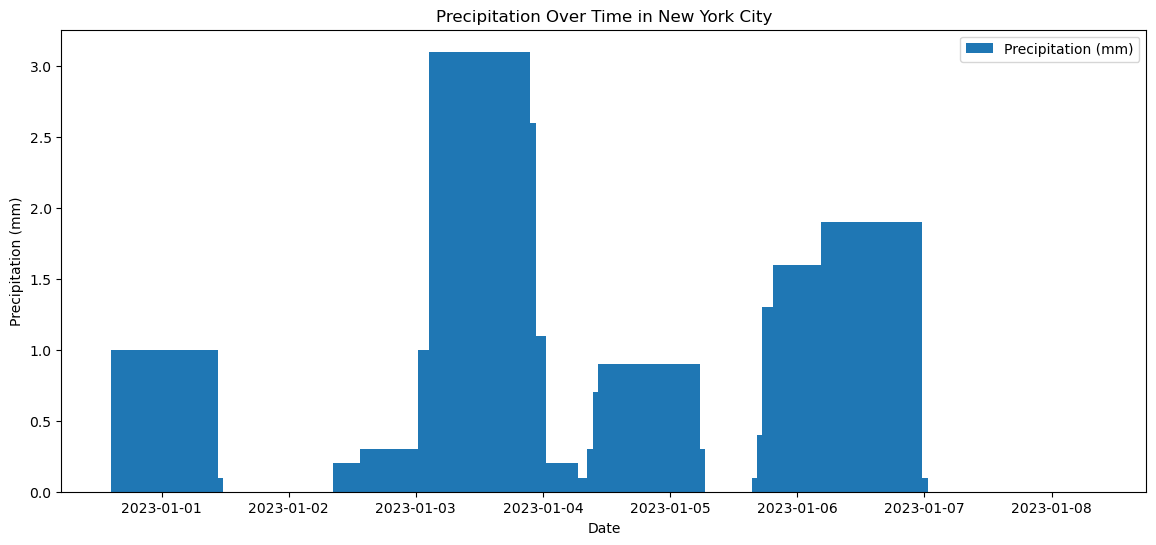

In [12]:
# Plot Precipitation Over Time

plt.figure(figsize=(14, 6))
plt.bar(df.index, df['precipitation'], label='Precipitation (mm)')
plt.title('Precipitation Over Time in New York City')
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')
plt.legend()
plt.show()


In [13]:
# Step 6: Correlation Analysis

# Calculate correlation between temperature and humidity
correlation = df['temperature_2m'].corr(df['relativehumidity_2m'])
print(f'Correlation between Temperature and Relative Humidity: {correlation:.2f}')


Correlation between Temperature and Relative Humidity: 0.24


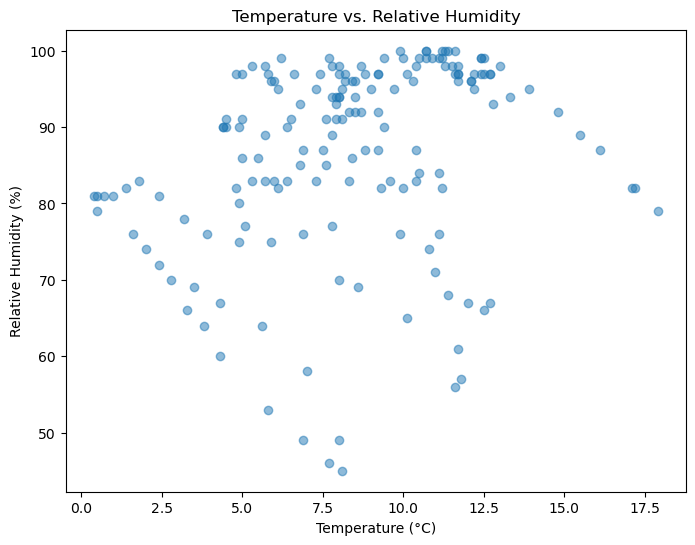

In [14]:
# Scatter Plot of Temperature vs. Relative Humidity

plt.figure(figsize=(8, 6))
plt.scatter(df['temperature_2m'], df['relativehumidity_2m'], alpha=0.5)
plt.title('Temperature vs. Relative Humidity')
plt.xlabel('Temperature (°C)')
plt.ylabel('Relative Humidity (%)')
plt.show()


In [15]:
# Step 7: Resample Data to Daily Averages

daily_avg = df.resample('D').mean()
daily_avg.head()


,temperature_2m,relativehumidity_2m,precipitation
time,,,
2023-01-01,8.850000,83.708333,0.087500
2023-01-02,7.775000,83.458333,0.020833
2023-01-03,9.408333,96.875000,0.395833
2023-01-04,12.995833,94.166667,0.095833
2023-01-05,9.916667,92.666667,0.000000


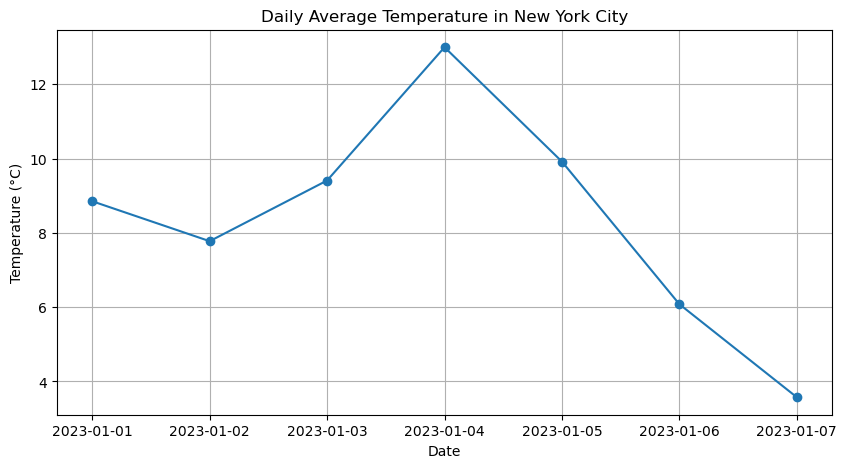

In [16]:
# Plot Daily Average Temperature

plt.figure(figsize=(10, 5))
plt.plot(daily_avg.index, daily_avg['temperature_2m'], marker='o')
plt.title('Daily Average Temperature in New York City')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()


In [17]:
# Step 8: Compare with Another Location (Los Angeles)

# Coordinates for Los Angeles
latitude_la = 34.0522
longitude_la = -118.2437

params_la = {
    'latitude': latitude_la,
    'longitude': longitude_la,
    'start_date': start_date,
    'end_date': end_date,
    'hourly': ','.join(hourly_variables),
    'timezone': 'America/Los_Angeles'
}

response_la = requests.get(base_url, params=params_la)

# Load and clean Los Angeles data
data_la = response_la.json()
hourly_data_la = data_la['hourly']
df_la = pd.DataFrame(hourly_data_la)

df_la['time'] = pd.to_datetime(df_la['time'])
df_la.set_index('time', inplace=True)
df_la.fillna(method='ffill', inplace=True)


C:\Users\USUARIO\AppData\Local\Temp\ipykernel_14168\4259999984.py:25: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_la.fillna(method='ffill', inplace=True)


In [18]:
# Resample Los Angeles Data to Daily Averages

daily_avg_la = df_la.resample('D').mean()


In [19]:
# Combine DataFrames for Comparison

combined_temp = pd.DataFrame({
    'New York': daily_avg['temperature_2m'],
    'Los Angeles': daily_avg_la['temperature_2m']
})


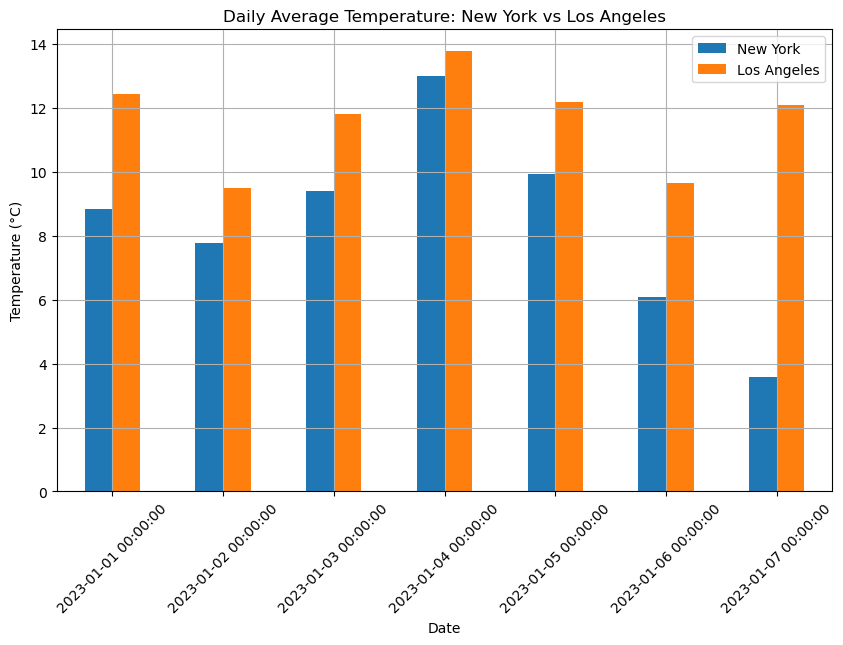

In [20]:
# Plot Comparison of Daily Average Temperature

combined_temp.plot(kind='bar', figsize=(10, 6))
plt.title('Daily Average Temperature: New York vs Los Angeles')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [21]:
# Step 9: Advanced Analysis - Temperature Difference

# Calculate Temperature Difference
combined_temp['Temp Difference'] = combined_temp['Los Angeles'] - combined_temp['New York']
combined_temp


,New York,Los Angeles,Temp Difference
time,,,
2023-01-01,8.850000,12.433333,3.583333
2023-01-02,7.775000,9.483333,1.708333
2023-01-03,9.408333,11.808333,2.400000
2023-01-04,12.995833,13.766667,0.770833
2023-01-05,9.916667,12.183333,2.266667
2023-01-06,6.079167,9.662500,3.583333
2023-01-07,3.575000,12.095833,8.520833


In [22]:
# Step 10: Save Data to CSV (Optional)

# Save New York data
df.to_csv('new_york_weather.csv')

# Save Los Angeles data
df_la.to_csv('los_angeles_weather.csv')


## Conclusion

In this exercise, we:

- Accessed and retrieved data from the **Open-Meteo API**.
- Cleaned and preprocessed JSON data using **pandas**.
- Performed exploratory data analysis and visualization.
- Compared weather patterns between **New York City** and **Los Angeles**.

---

**Next Steps**:

- **Extend the Date Range**: Analyze seasonal trends by fetching data over several months.
- **Fetch Additional Variables**: Include wind speed, atmospheric pressure, or other interesting variables.
- **Forecasting**: Use statistical methods or machine learning models to forecast future weather patterns.
- **Global Analysis**: Compare data from other global cities to gain broader insights.


## Exercises for Students

Now it's your turn! Below are some exercises to reinforce what you've learned. Try to complete them without looking at the solutions.

### Exercise: Compare Rainfall Between London and Seattle

- **Objective**: Compare the total weekly rainfall between London and Seattle over a full year.
- **Tasks**:
  1. **Fetch Data**: Retrieve hourly precipitation data for London and Seattle for the year 2022.
     - **London Coordinates**: Latitude `51.5074`, Longitude `-0.1278`
     - **Seattle Coordinates**: Latitude `47.6062`, Longitude `-122.3321`
  2. **Data Cleaning**: Convert the time columns to datetime objects and set them as the index. Handle any missing values.
  3. **Resample Data**: Resample the hourly data to weekly totals.
  4. **Visualization**: Plot the weekly total precipitation for both cities on the same graph.
  5. **Analysis**: Determine which city had more rainfall overall and identify any interesting patterns.

**Note**: Remember to handle any API limitations, such as data availability or rate limits, and to be mindful of the size of the data you're requesting.

### Tips:

- **API Parameters**: Make sure to adjust the parameters like `latitude`, `longitude`, `start_date`, `end_date`, `hourly`, and `timezone` as needed.
- **Error Handling**: Always check if your API requests are successful before proceeding.
- **Data Storage**: Consider saving your DataFrames to CSV files for future analysis.
- **Visualization**: Customize your plots with titles, labels, legends, and gridlines for better readability.

Happy coding!


In [24]:
# --- Exercise: Compare Rainfall Between London and Seattle ---

# Objective: Compare the total weekly rainfall between London and Seattle over a full year (2022).

# API Endpoint: https://archive-api.open-meteo.com/v1/archive
# Parameters:
#   latitude: Latitude of the location.
#   longitude: Longitude of the location.
#   start_date: Start date of the data (YYYY-MM-DD).
#   end_date: End date of the data (YYYY-MM-DD).
#   hourly: Comma-separated list of variables (e.g., precipitation).
#   timezone: Timezone of the data.

# --- Step 1: Set Up Parameters ---

# Date range for the full year 2022
start_date = '2022-01-01'
end_date = '2022-12-31'

# Variable to fetch (precipitation)
hourly_variables = ['precipitation']

# Location coordinates and timezones
# London
latitude_london = 51.5074
longitude_london = -0.1278
timezone_london = 'Europe/London'

# Seattle
latitude_seattle = 47.6062
longitude_seattle = -122.3321
timezone_seattle = 'America/Los_Angeles' # Pacific Standard Time zone




In [25]:
# --- Step 2: Make the API Request ---

base_url = 'https://archive-api.open-meteo.com/v1/archive'

# Parameters for London
params_london = {
    'latitude': latitude_london,
    'longitude': longitude_london,
    'start_date': start_date,
    'end_date': end_date,
    'hourly': ','.join(hourly_variables),
    'timezone': timezone_london
}

# Send API request for London
print("Fetching London weather data...")
response_london = requests.get(base_url, params=params_london)

# Parameters for Seattle
params_seattle = {
    'latitude': latitude_seattle,
    'longitude': longitude_seattle,
    'start_date': start_date,
    'end_date': end_date,
    'hourly': ','.join(hourly_variables),
    'timezone': timezone_seattle
}

# Send API request for Seattle
print("Fetching Seattle weather data...")
response_seattle = requests.get(base_url, params=params_seattle)


# Check if the requests were successful
if response_london.status_code == 200:
    print('London data fetched successfully!')
else:
    print(f'Failed to fetch London data. Status code: {response_london.status_code}')

if response_seattle.status_code == 200:
    print('Seattle data fetched successfully!')
else:
    print(f'Failed to fetch Seattle data. Status code: {response_seattle.status_code}')





Fetching London weather data...
Fetching Seattle weather data...
London data fetched successfully!
Seattle data fetched successfully!


In [29]:
# --- Step 3: Load Data into pandas DataFrame and Initial Preprocessing ---

df_london = pd.DataFrame() # Initialize empty DataFrame
df_seattle = pd.DataFrame() # Initialize empty DataFrame

if response_london.status_code == 200:
    data_london = response_london.json()
    if 'hourly' in data_london:
        hourly_data_london = data_london['hourly']
        df_london = pd.DataFrame(hourly_data_london)
        # Convert 'time' column to datetime and set as index immediately
        df_london['time'] = pd.to_datetime(df_london['time'])
        df_london.set_index('time', inplace=True)
    else:
        print("No 'hourly' data found in London response.")

if response_seattle.status_code == 200:
    data_seattle = response_seattle.json()
    if 'hourly' in data_seattle:
        hourly_data_seattle = data_seattle['hourly']
        df_seattle = pd.DataFrame(hourly_data_seattle)
        # Convert 'time' column to datetime and set as index immediately
        df_seattle['time'] = pd.to_datetime(df_seattle['time'])
        df_seattle.set_index('time', inplace=True)
    else:
        print("No 'hourly' data found in Seattle response.")

print("\n--- Initial DataFrames Head (after setting index) ---")
print("London:")
print(df_london.head())
print("\nSeattle:")
print(df_seattle.head())





--- Initial DataFrames Head (after setting index) ---
London:
                     precipitation
time                              
2022-01-01 00:00:00            0.0
2022-01-01 01:00:00            0.0
2022-01-01 02:00:00            0.0
2022-01-01 03:00:00            0.0
2022-01-01 04:00:00            0.0

Seattle:
                     precipitation
time                              
2022-01-01 00:00:00            0.0
2022-01-01 01:00:00            0.0
2022-01-01 02:00:00            0.0
2022-01-01 03:00:00            0.0
2022-01-01 04:00:00            0.0


In [37]:
df_seattle.head()

,precipitation
time,
2022-01-01 00:00:00,0.0
2022-01-01 01:00:00,0.0
2022-01-01 02:00:00,0.0
2022-01-01 03:00:00,0.0
2022-01-01 04:00:00,0.0


In [30]:
# --- Step 4: Data Cleaning (Focus on Missing Values) ---

print("\n--- Data Cleaning (Filling NaNs) ---")
def clean_weather_df_nans(df, column_name='precipitation'):
    # This function now assumes 'time' is already the index.
    if not df.empty:
        # For precipitation, NaNs usually mean 0.
        # Assign the result of fillna back to the column directly.
        df[column_name] = df[column_name].fillna(0)
        print(f"Missing values after cleaning for {column_name}:\n{df.isnull().sum()}")
    return df

# Apply the cleaned function for NaN handling
df_london = clean_weather_df_nans(df_london, 'precipitation')
df_seattle = clean_weather_df_nans(df_seattle, 'precipitation')




--- Data Cleaning (Filling NaNs) ---
Missing values after cleaning for precipitation:
precipitation    0
dtype: int64
Missing values after cleaning for precipitation:
precipitation    0
dtype: int64


In [31]:
# --- Step 5: Resample Data to Weekly Totals ---

print("\n--- Resampling Data to Weekly Totals ---")
weekly_total_london = pd.Series(dtype='float64')
weekly_total_seattle = pd.Series(dtype='float64')

if not df_london.empty:
    weekly_total_london = df_london['precipitation'].resample('W').sum()
    print("London Weekly Totals Head:")
    print(weekly_total_london.head())
else:
    print("London DataFrame is empty, skipping weekly resampling.")

if not df_seattle.empty:
    weekly_total_seattle = df_seattle['precipitation'].resample('W').sum()
    print("\nSeattle Weekly Totals Head:")
    print(weekly_total_seattle.head())
else:
    print("Seattle DataFrame is empty, skipping weekly resampling.")


--- Resampling Data to Weekly Totals ---
London Weekly Totals Head:
time
2022-01-02     2.2
2022-01-09    12.9
2022-01-16     3.1
2022-01-23     0.0
2022-01-30     0.1
Freq: W-SUN, Name: precipitation, dtype: float64

Seattle Weekly Totals Head:
time
2022-01-02     31.3
2022-01-09    108.8
2022-01-16     45.5
2022-01-23     15.7
2022-01-30      6.1
Freq: W-SUN, Name: precipitation, dtype: float64


In [32]:
# --- Step 6: Combine DataFrames for Comparison ---

combined_rainfall = pd.DataFrame()
if not weekly_total_london.empty and not weekly_total_seattle.empty:
    combined_rainfall = pd.DataFrame({
        'London': weekly_total_london,
        'Seattle': weekly_total_seattle
    })
    combined_rainfall.fillna(0, inplace=True) # Fill any potential NaNs after resampling
    combined_rainfall.index.name = 'Week Start Date'
    print("\n--- Combined Weekly Rainfall Data Head ---")
    print(combined_rainfall.head())
else:
    print("\nCannot combine rainfall data: one or both weekly total Series are empty.")



--- Combined Weekly Rainfall Data Head ---
                 London  Seattle
Week Start Date                 
2022-01-02          2.2     31.3
2022-01-09         12.9    108.8
2022-01-16          3.1     45.5
2022-01-23          0.0     15.7
2022-01-30          0.1      6.1


In [51]:
combined_rainfall[0:100]

,London,Seattle
Week Start Date,,
2022-01-02,2.2,31.3
2022-01-09,12.9,108.8
2022-01-16,3.1,45.5
2022-01-23,0.0,15.7
2022-01-30,0.1,6.1
2022-02-06,9.1,5.6
2022-02-13,14.3,1.2
2022-02-20,27.6,11.9
2022-02-27,4.5,32.4



--- Visualization: Weekly Total Precipitation ---


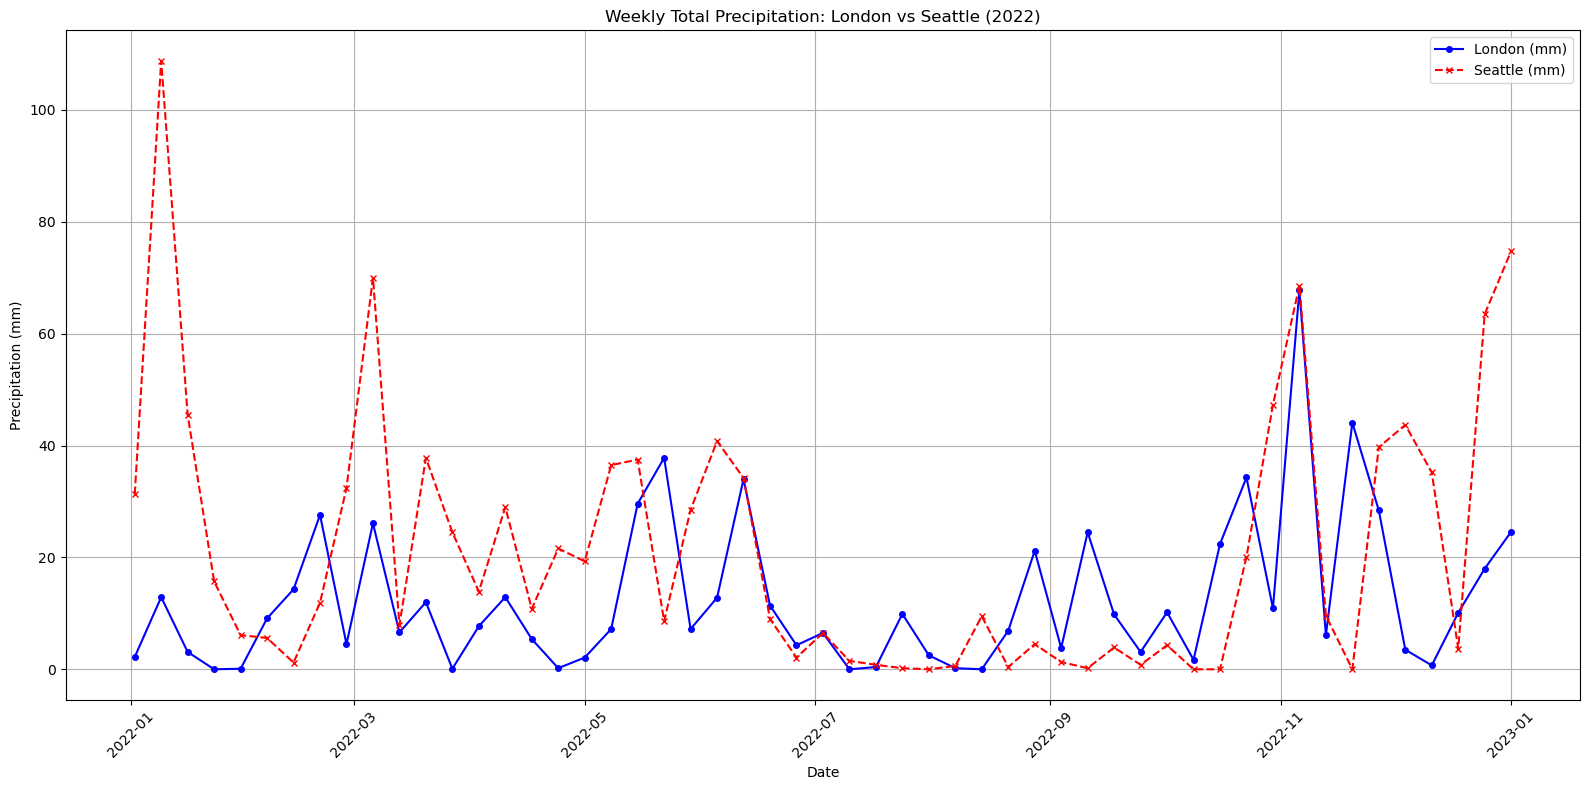

In [40]:
# --- Step 7: Visualization ---

if not combined_rainfall.empty:
    print("\n--- Visualization: Weekly Total Precipitation ---")
    plt.figure(figsize=(16, 8))

    # Plot London data with a specific color (e.g., 'blue')
    plt.plot(combined_rainfall.index, combined_rainfall['London'],
             label='London (mm)',
             marker='o',
             markersize=4,
             linestyle='-',
             color='blue') # Added color for London

    # Plot Seattle data with a different specific color (e.g., 'red')
    plt.plot(combined_rainfall.index, combined_rainfall['Seattle'],
             label='Seattle (mm)',
             marker='x',
             markersize=4,
             linestyle='--',
             color='red') # Added color for Seattle

    plt.title('Weekly Total Precipitation: London vs Seattle (2022)')
    plt.xlabel('Date')
    plt.ylabel('Precipitation (mm)')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("\nCannot plot: Combined rainfall DataFrame is empty.")

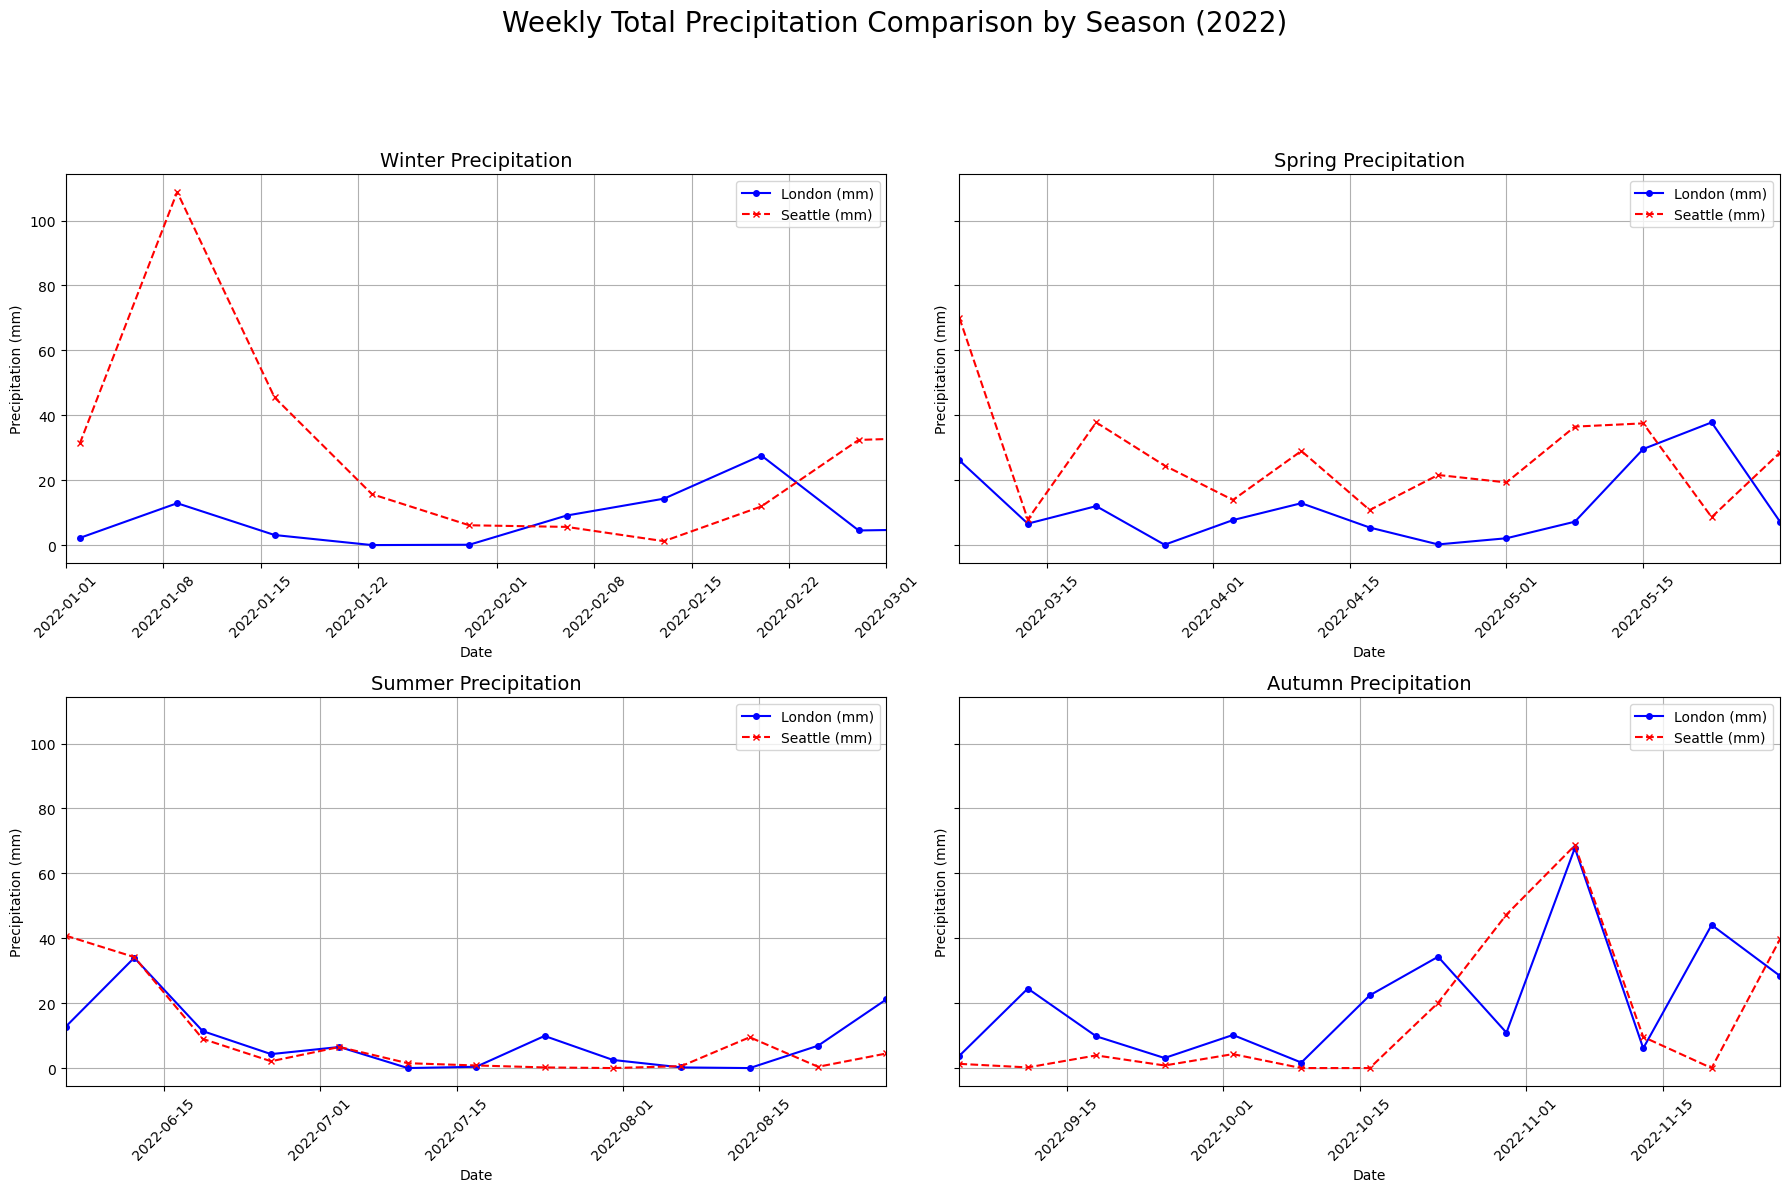

In [48]:
# --- Define Seasons and their corresponding months ---
seasons = {
    'Winter': [1, 2],       # January, February
    'Spring': [3, 4, 5],     # March, April, May
    'Summer': [6, 7, 8],     # June, July, August
    'Autumn': [9, 10, 11]    # September, October, November
}

# --- Create the 2x2 subplot grid ---
fig, axes = plt.subplots(2, 2, figsize=(18, 12), sharey=True)
axes = axes.flatten()

fig.suptitle('Weekly Total Precipitation Comparison by Season (2022)', fontsize=20, y=1.02)

# --- Plot data for each season ---
for i, (season_name, months) in enumerate(seasons.items()):
    ax = axes[i]

    # Filter data for the current season's months
    seasonal_data = combined_rainfall[combined_rainfall.index.month.isin(months)]

    # Plot London data
    ax.plot(seasonal_data.index, seasonal_data['London'],
            label='London (mm)',
            marker='o', markersize=4, linestyle='-',
            color='blue')

    # Plot Seattle data
    ax.plot(seasonal_data.index, seasonal_data['Seattle'],
            label='Seattle (mm)',
            marker='x', markersize=4, linestyle='--',
            color='red')

    # Set subplot title and labels
    ax.set_title(f'{season_name} Precipitation', fontsize=14)
    ax.set_xlabel('Date')
    ax.set_ylabel('Precipitation (mm)')
    ax.legend()
    ax.grid(True)
    ax.tick_params(axis='x', rotation=45)

    # --- ADJUSTMENT HERE: Explicitly set x-axis limits for each season ---
    if not seasonal_data.empty:
        # Determine the min and max dates for the current season's data
        # For Winter specifically, you want a fixed range of Jan 1 to Feb 28/29
        if season_name == 'Winter':
            # Set specific start and end dates for Winter 2022
            # Use pd.Timestamp for clear datetime objects
            x_start = pd.Timestamp('2022-01-01')
            x_end = pd.Timestamp('2022-03-01') # Go slightly into March to cover all Feb
            ax.set_xlim(x_start, x_end)
        else:
            # For other seasons, setting limits based on actual data range is usually fine
            ax.set_xlim(seasonal_data.index.min(), seasonal_data.index.max())
    else:
        # If no data for a season, set a default range for the year 2022 based on the months
        start_month_val = min(months)
        end_month_val = max(months)
        ax.set_xlim(pd.Timestamp(f'2022-{start_month_val:02d}-01'), pd.Timestamp(f'2022-{end_month_val:02d}-28'))
        ax.text(0.5, 0.5, 'No data for this season', transform=ax.transAxes,
                horizontalalignment='center', verticalalignment='center', fontsize=12, color='gray')


# Adjust layout to prevent overlapping titles/labels
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [35]:
# --- Step 8: Analysis ---

if not combined_rainfall.empty:
    print("\n--- Analysis ---")
    total_rainfall_london = combined_rainfall['London'].sum()
    total_rainfall_seattle = combined_rainfall['Seattle'].sum()

    print(f"Total rainfall in London (2022): {total_rainfall_london:.2f} mm")
    print(f"Total rainfall in Seattle (2022): {total_rainfall_seattle:.2f} mm")

    if total_rainfall_london > total_rainfall_seattle:
        print(f"Conclusion: London had more rainfall overall in 2022 by {total_rainfall_london - total_rainfall_seattle:.2f} mm.")
    elif total_rainfall_seattle > total_rainfall_london:
        print(f"Conclusion: Seattle had more rainfall overall in 2022 by {total_rainfall_seattle - total_rainfall_london:.2f} mm.")
    else:
        print("Conclusion: Both cities had approximately the same amount of rainfall in 2022.")

    print("\nInteresting patterns to observe from the plot:")
    print("- Look for seasonal trends: Which months are rainiest/driest for each city?")
    print("- Identify any significant weekly spikes in precipitation.")
    print("- Compare the consistency of rainfall: Does one city have more frequent but lighter rain, or fewer but heavier downpours?")
    print("- Note periods where one city clearly outperforms the other in terms of rainfall.")
else:
    print("\nCannot perform analysis: Combined rainfall DataFrame is empty.")


--- Analysis ---
Total rainfall in London (2022): 662.80 mm
Total rainfall in Seattle (2022): 1131.20 mm
Conclusion: Seattle had more rainfall overall in 2022 by 468.40 mm.

Interesting patterns to observe from the plot:
- Look for seasonal trends: Which months are rainiest/driest for each city?
- Identify any significant weekly spikes in precipitation.
- Compare the consistency of rainfall: Does one city have more frequent but lighter rain, or fewer but heavier downpours?
- Note periods where one city clearly outperforms the other in terms of rainfall.


### Weekly Precipitation Comparison: London vs. Seattle (2022) - Summarized Analysis

This analysis is based on weekly precipitation totals for London and Seattle from January 2022 to early January 2023.

---

#### 1. Seasonal Trends: Rainiest & Driest Months/Seasons

| City    | Rainiest Month (Total mm) | Driest Month (Total mm) | Dominant Wet Season |
| :------ | :------------------------ | :---------------------- | :------------------ |
| **London** | November (146.4 mm)       | July (19.3 mm)          | Autumn (267.1 mm)   |
| **Seattle**| January (252.2 mm)        | September (6.2 mm)      | Spring (345.9 mm)   |

**Key Insight:** London's wettest period is late autumn/early winter, while Seattle's is concentrated in early winter and spring. Both cities experience their driest periods in late summer/early autumn.

---

#### 2. Significant Weekly Spikes

* **London's highest weekly totals:**
    * 67.8 mm (Nov 6)
    * 44.1 mm (Nov 20)
    * 37.8 mm (May 22)
* **Seattle's highest weekly totals:**
    * **108.8 mm (Jan 9)** - Significantly higher than London's highest.
    * 74.8 mm (Jan 1, 2023)
    * 70.0 mm (Mar 6)

**Key Insight:** Seattle experiences more extreme weekly precipitation events, with its highest spikes notably surpassing London's.

---


**Overall Conclusion:**

While both cities receive substantial rainfall, **Seattle generally experiences higher total precipitation and more extreme, concentrated rainfall events**, particularly during its winter and spring. **London's rainfall is more spread out and consistent** throughout the year, with its wettest period occurring in late autumn.

In [36]:
# --- Step 9: Save Data to CSV (Optional) ---

print("\n--- Saving Data (Optional) ---")
if not df_london.empty:
    df_london.to_csv('london_hourly_precipitation_2022.csv')
    print("London hourly data saved to 'london_hourly_precipitation_2022.csv'")
if not df_seattle.empty:
    df_seattle.to_csv('seattle_hourly_precipitation_2022.csv')
    print("Seattle hourly data saved to 'seattle_hourly_precipitation_2022.csv'")
if not combined_rainfall.empty:
    combined_rainfall.to_csv('london_seattle_weekly_precipitation_2022.csv')
    print("Combined weekly precipitation data saved to 'london_seattle_weekly_precipitation_2022.csv'")


# --- Conclusion ---
print("\n--- Conclusion of Exercise ---")
print("In this exercise, we successfully:")
print("- Fetched hourly precipitation data for London and Seattle for the year 2022 using the Open-Meteo API.")
print("- Cleaned and preprocessed the JSON data into pandas DataFrames, including converting time to datetime and setting it as the index.")
print("- Resampled the hourly data to weekly total precipitation.")
print("- Visualized the weekly precipitation trends for both cities on a single graph.")
print("- Performed a basic analysis to compare their total annual rainfall and identify patterns.")



--- Saving Data (Optional) ---
London hourly data saved to 'london_hourly_precipitation_2022.csv'
Seattle hourly data saved to 'seattle_hourly_precipitation_2022.csv'
Combined weekly precipitation data saved to 'london_seattle_weekly_precipitation_2022.csv'

--- Conclusion of Exercise ---
In this exercise, we successfully:
- Fetched hourly precipitation data for London and Seattle for the year 2022 using the Open-Meteo API.
- Cleaned and preprocessed the JSON data into pandas DataFrames, including converting time to datetime and setting it as the index.
- Resampled the hourly data to weekly total precipitation.
- Visualized the weekly precipitation trends for both cities on a single graph.
- Performed a basic analysis to compare their total annual rainfall and identify patterns.
